# Descriptive Statistics with Pandas

This notebook demonstrates how to perform descriptive statistics using Pandas on a weather dataset. We will explore the data, calculate summary statistics, and visualize the distributions of key variables.


In [1]:
# Import necessary libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from mylib.lib import load_dataset, calculate_statistics, create_histogram

# Define file path
file_path = "rdu-weather-history.csv"

# Load the data using the provided function
data = load_dataset(file_path)
assert isinstance(data, pd.DataFrame), "Loaded data should be a DataFrame"

# Display the first few rows of the data
data.head()


,Date,Temperature Minimum,Temperature Maximum,Precipitation,Snowfall,Snow Depth,Avgerage Wind Speed
0,2022-01-08,21,42,0.0,0.0,0.0,3.8
1,2022-01-17,33,42,0.0,0.0,0.0,13.0
2,2022-01-26,28,42,0.0,0.0,0.0,8.5
3,2022-02-05,27,47,0.0,0.0,0.0,6.5
4,2022-02-08,33,50,0.0,0.0,0.0,2.9


In [2]:
# Calculate descriptive statistics 
desc_stats = calculate_statistics(data)
desc_stats
assert isinstance(desc_stats, pd.DataFrame), "Descriptive statistics should be a DataFrame"


,Temperature Minimum,Temperature Maximum,Precipitation,Snowfall,Snow Depth,Avgerage Wind Speed
mean,44.225166,66.966887,0.127020,0.017748,0.033113,7.010204
median,45.000000,70.000000,0.000000,0.000000,0.000000,6.700000
std_dev,14.538763,14.719337,0.327184,0.140917,0.242685,3.171226


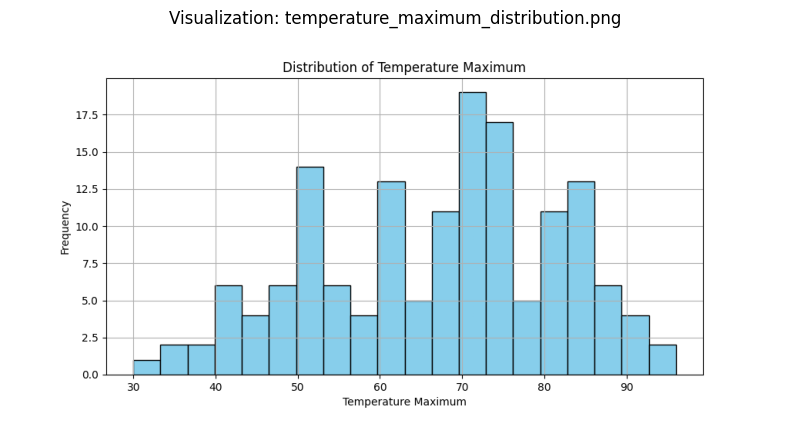

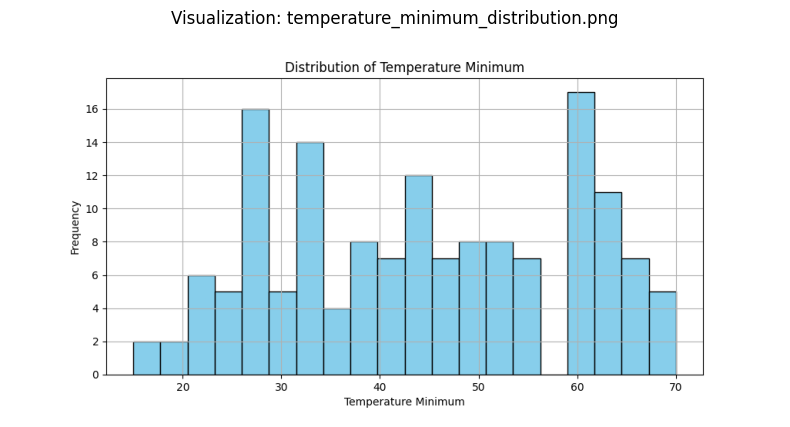

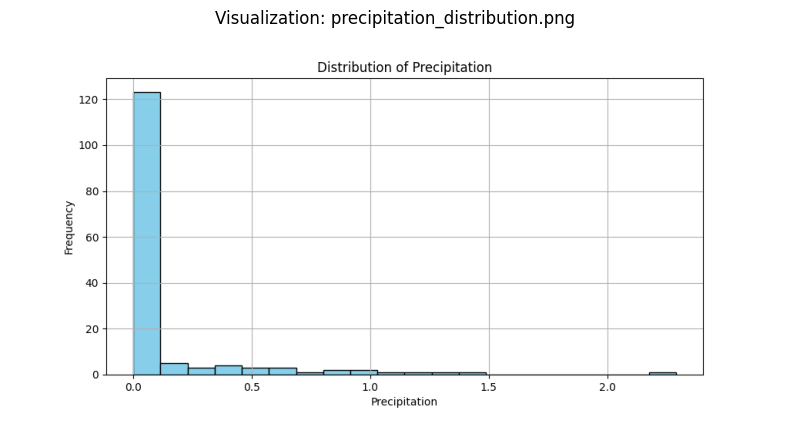

In [4]:
# Generate and save visualizations for the specified columns
image_paths = generate_visualizations(file_path)

# Display the generated plots inline in the notebook
for image_path in image_paths:
    plt.figure(figsize=(10, 5))
    plt.imshow(plt.imread(image_path))
    plt.axis('off')  # Hide axes
    plt.title(f"Visualization: {image_path}")
    plt.show()


In [ ]:
header_columns = ["Temperature Maximum", "Temperature Minimum", "Precipitation"]
for column in header_columns:
    # Define the image path for the histogram
    image_path = f"{column.lower().replace(' ', '_')}_distribution.png"
    create_histogram(data, column, image_path)

    assert os.path.isfile(image_path), f"Histogram file {image_path} should be created for {column}"

    file_size = os.path.getsize(image_path)
    assert file_size > 0, f"Histogram file {image_path} should not be empty for {column}, but its size is {file_size} bytes"
    
    os.remove(image_path)